## Studmarks

In [1]:
!pip install mysql connector python

  Using cached https://files.pythonhosted.org/packages/bf/5f/b574ac9f70811df0540e403309f349a8b9fa1a25d3653824c32e52cc1f28/mysql-0.0.2.tar.gz


  ERROR: Could not find a version that satisfies the requirement connector (from versions: none)
ERROR: No matching distribution found for connector


In [2]:
import mysql.connector

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
con = mysql.connector.connect(
    host = "localhost",
    port = 3306,
    user = "root",
    password = "July12345",
    database = "testdb")

In [7]:
data = pd.read_sql_query("select * from studmarks",con)
data

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,Name,Ge,DOB,0,0,0,0,0,0,0,0
1,John,M,05-04-1988,55,45,56,87,21,52,89,65
2,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
3,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
4,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
5,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53
6,Annu,F,05-04-1988,45,87,52,89,55,89,87,52
7,pooja,F,04-05-1987,55,64,61,58,75,58,64,61
8,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87
9,Farha,F,12-08-1990,55,63,89,75,78,75,63,89


#### Lets Drop the first row

In [12]:
data.drop(0,axis=0, inplace=True)

In [13]:
data

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
1,John,M,05-04-1988,55,45,56,87,21,52,89,65
2,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
3,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
4,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
5,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53
6,Annu,F,05-04-1988,45,87,52,89,55,89,87,52
7,pooja,F,04-05-1987,55,64,61,58,75,58,64,61
8,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87
9,Farha,F,12-08-1990,55,63,89,75,78,75,63,89
10,Mukesh,M,02-09-1989,96,46,77,83,58,83,46,77


### Lets Delete the Name column Because it is not Useful

In [18]:
data.drop('Name',axis=1,inplace=True)

In [19]:
data

,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
1,M,05-04-1988,55,45,56,87,21,52,89,65
2,M,04-05-1987,75,96,78,64,90,61,58,2
3,M,25-05-1989,25,54,89,76,95,87,56,74
4,F,12-08-1990,78,96,86,63,54,89,75,45
5,F,02-09-1989,58,96,78,46,96,77,83,53
6,F,05-04-1988,45,87,52,89,55,89,87,52
7,F,04-05-1987,55,64,61,58,75,58,64,61
8,M,25-05-1989,54,76,87,56,25,56,76,87
9,F,12-08-1990,55,63,89,75,78,75,63,89
10,M,02-09-1989,96,46,77,83,58,83,46,77


### Lets Delete the DOB Column it is also not Useful

In [20]:
data.drop('DOB',axis=1,inplace=True)

In [21]:
data

,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
1,M,55,45,56,87,21,52,89,65
2,M,75,96,78,64,90,61,58,2
3,M,25,54,89,76,95,87,56,74
4,F,78,96,86,63,54,89,75,45
5,F,58,96,78,46,96,77,83,53
6,F,45,87,52,89,55,89,87,52
7,F,55,64,61,58,75,58,64,61
8,M,54,76,87,56,25,56,76,87
9,F,55,63,89,75,78,75,63,89
10,M,96,46,77,83,58,83,46,77


### Convert Gender Column into a Boolean Format

In [23]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [24]:
array = data['Gender']

array.shape

(10,)

In [26]:
le=LabelEncoder()
data1=le.fit_transform(data['Gender'])
data1

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [27]:
data['Gender'] = data1
data

,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
1,1,55,45,56,87,21,52,89,65
2,1,75,96,78,64,90,61,58,2
3,1,25,54,89,76,95,87,56,74
4,0,78,96,86,63,54,89,75,45
5,0,58,96,78,46,96,77,83,53
6,0,45,87,52,89,55,89,87,52
7,0,55,64,61,58,75,58,64,61
8,1,54,76,87,56,25,56,76,87
9,0,55,63,89,75,78,75,63,89
10,1,96,46,77,83,58,83,46,77


In [29]:
#Lets check the null values without using visualization

data.isnull().sum()

Gender       0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64

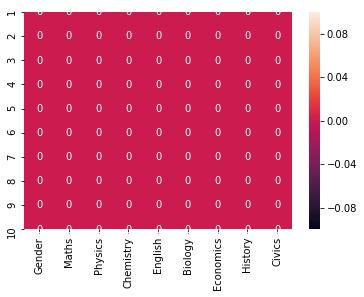

In [30]:
#Lets check wheather the null values are present in the dataset or not using heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.isnull(),annot=True)
plt.show()

In [31]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(10, 9)
(10, 9)


In [32]:
#Check Skewness 
data.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

Gender       0.000000
Maths        0.246964
Physics     -0.045336
Chemistry   -0.746462
English     -0.131222
Biology     -0.496446
Economics   -0.245555
History     -0.131222
Civics      -1.332448
dtype: float64

In [33]:
#Treating the skewness using log
import numpy as np
for col in data.columns:
#Here complete column name has been passed
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [34]:
#Lets Again Check the Skewness
data.skew()

Gender       0.000000
Maths        0.246964
Physics     -0.045336
Chemistry   -0.746462
English     -0.131222
Biology     -0.496446
Economics   -0.245555
History     -0.131222
Civics      -1.332448
dtype: float64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 9 columns):
Gender       10 non-null int32
Maths        10 non-null int64
Physics      10 non-null int64
Chemistry    10 non-null int64
English      10 non-null int64
Biology      10 non-null int64
Economics    10 non-null int64
History      10 non-null int64
Civics       10 non-null int64
dtypes: int32(1), int64(8)
memory usage: 760.0 bytes


In [36]:
data.describe()

,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,0.500000,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,0.527046,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,0.000000,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,0.000000,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,0.500000,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,1.000000,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,1.000000,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


In [37]:
dfcor = data.corr()
dfcor

,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Gender,1.000000,0.075832,-0.454052,0.158109,0.255257,-0.269398,-0.353067,-0.342774,0.020796
Maths,0.075832,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629
Physics,-0.454052,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266
Chemistry,0.158109,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908
English,0.255257,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705
Biology,-0.269398,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060
Economics,-0.353067,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905
History,-0.342774,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686
Civics,0.020796,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000


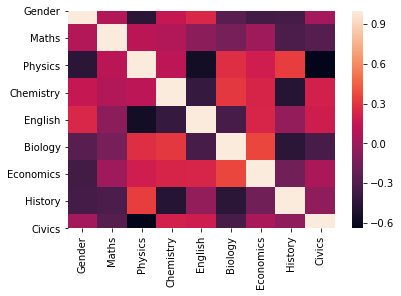

In [38]:
sns.heatmap(dfcor)

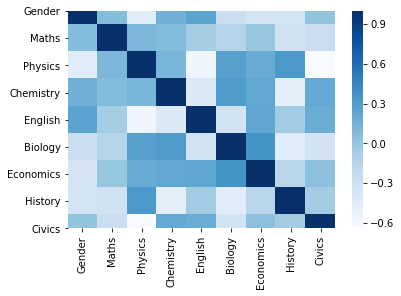

In [39]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=False)

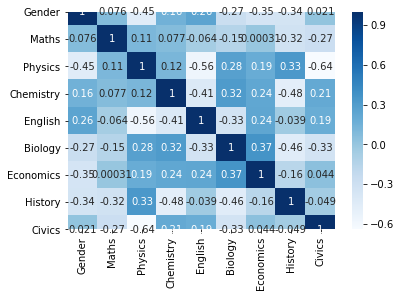

In [40]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

In [41]:
data

,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
1,1,55,45,56,87,21,52,89,65
2,1,75,96,78,64,90,61,58,2
3,1,25,54,89,76,95,87,56,74
4,0,78,96,86,63,54,89,75,45
5,0,58,96,78,46,96,77,83,53
6,0,45,87,52,89,55,89,87,52
7,0,55,64,61,58,75,58,64,61
8,1,54,76,87,56,25,56,76,87
9,0,55,63,89,75,78,75,63,89
10,1,96,46,77,83,58,83,46,77


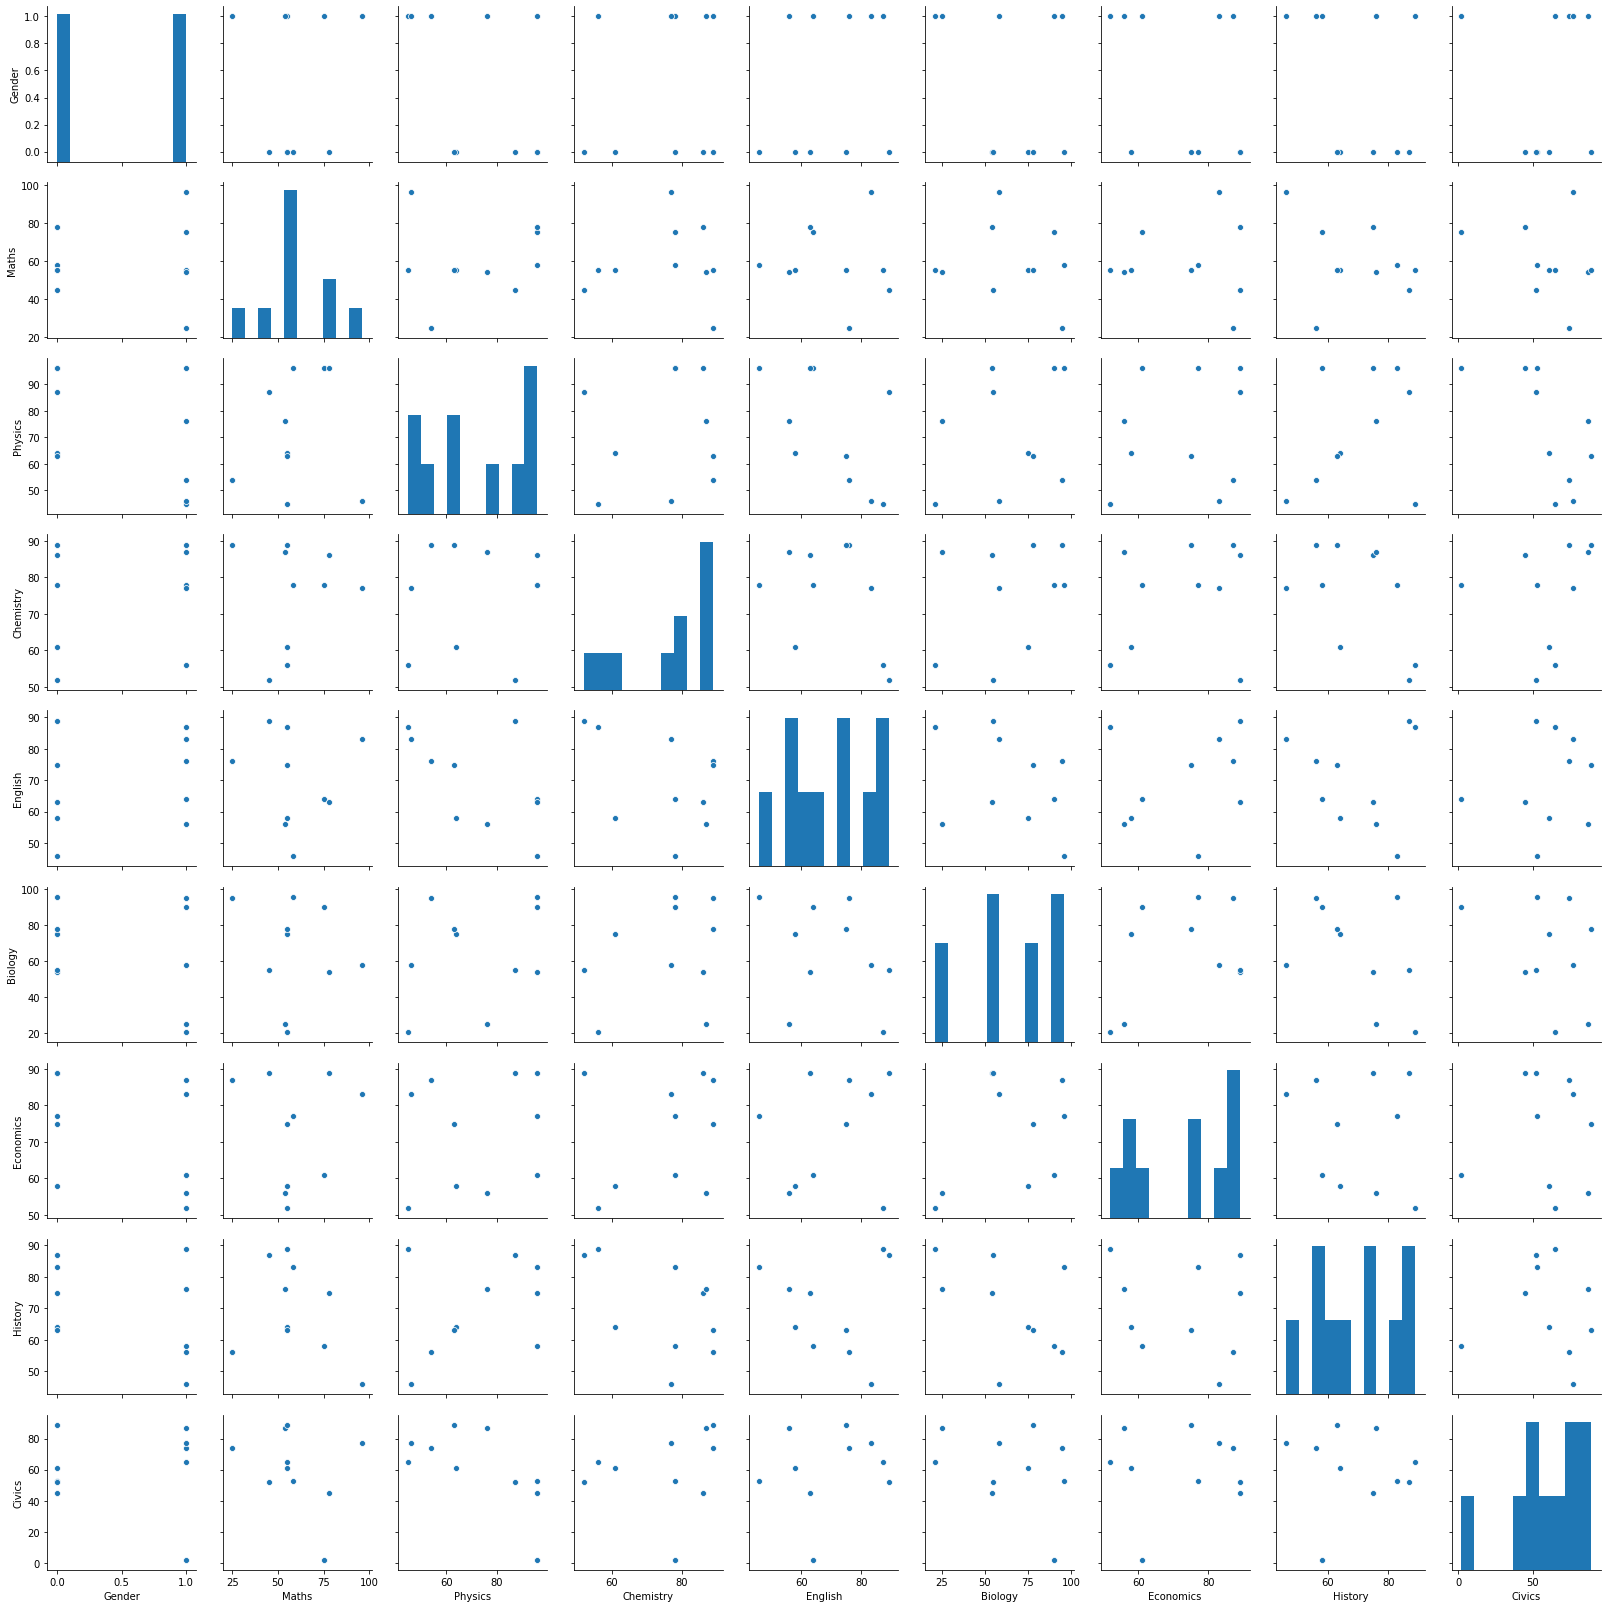

In [42]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(data)
plt.show()

#### Plotting Boxplot through Iteration

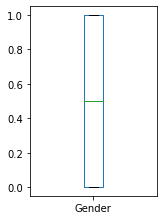

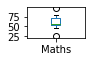

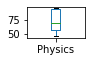

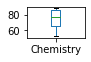

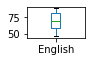

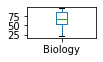

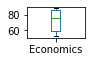

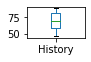

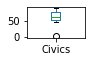

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

### Plotting Displot Through Iteration

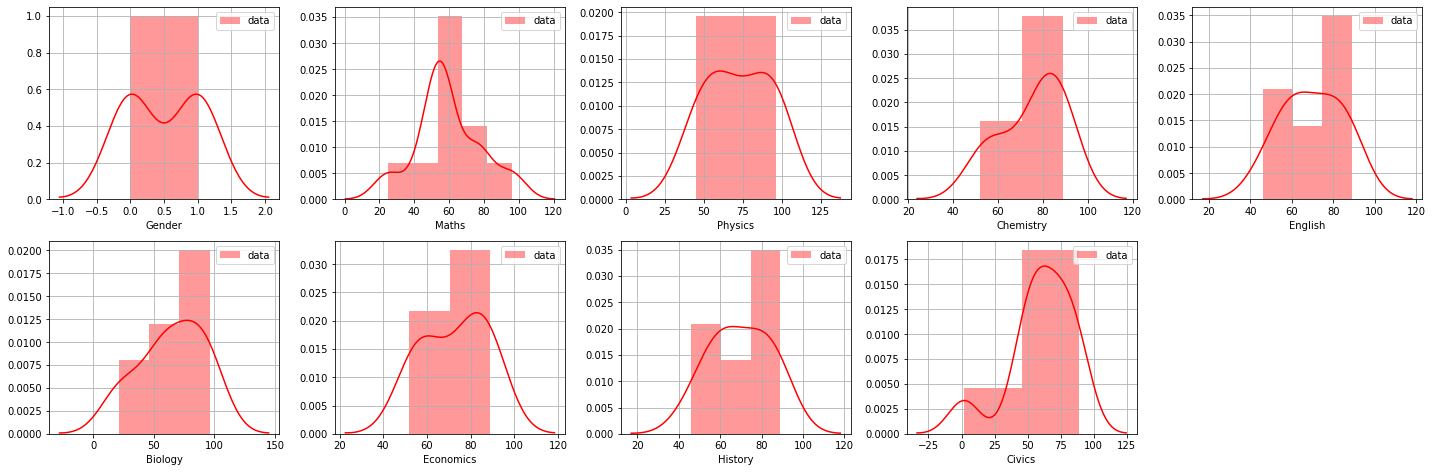

In [44]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(data[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

In [45]:
data.columns

Index(['Gender', 'Maths', 'Physics', 'Chemistry', 'English', 'Biology',
       'Economics', 'History', 'Civics'],
      dtype='object')

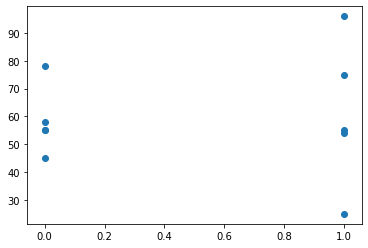

In [46]:
plt.scatter(data['Gender'],data['Maths'])

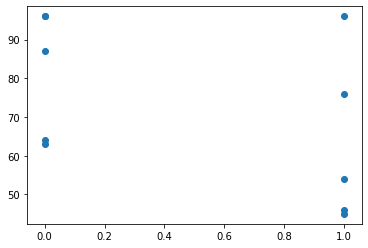

In [47]:
plt.scatter(data['Gender'],data['Physics'])

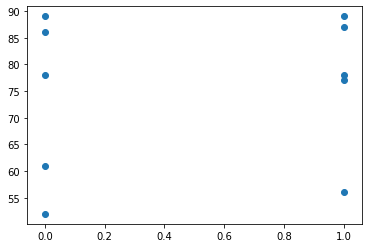

In [48]:
plt.scatter(data['Gender'],data['Chemistry'])

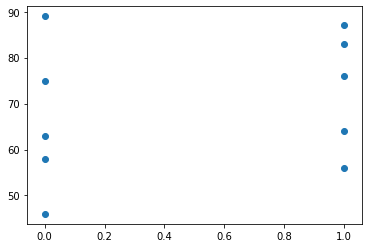

In [49]:
plt.scatter(data['Gender'],data['English'])

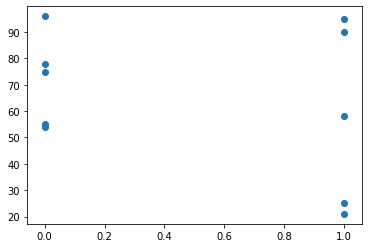

In [50]:
plt.scatter(data['Gender'],data['Biology'])

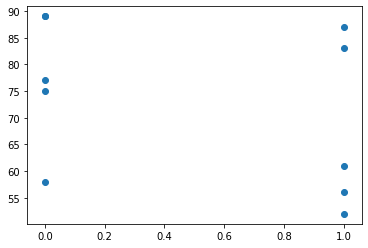

In [51]:
plt.scatter(data['Gender'],data['Economics'])

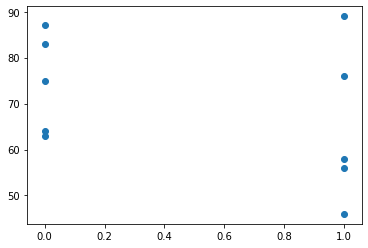

In [52]:
plt.scatter(data['Gender'],data['History'])

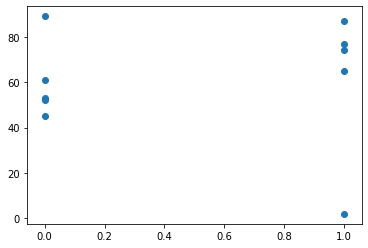

In [53]:
plt.scatter(data['Gender'],data['Civics'])

In [55]:
collist = data.columns.values
ncols=12
nrows=10

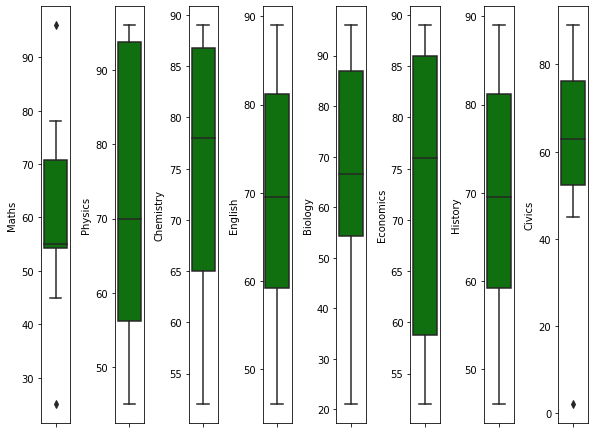

In [57]:
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()